## Real Estates - Price Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
# checking missing values
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
# Descriptive analysis
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

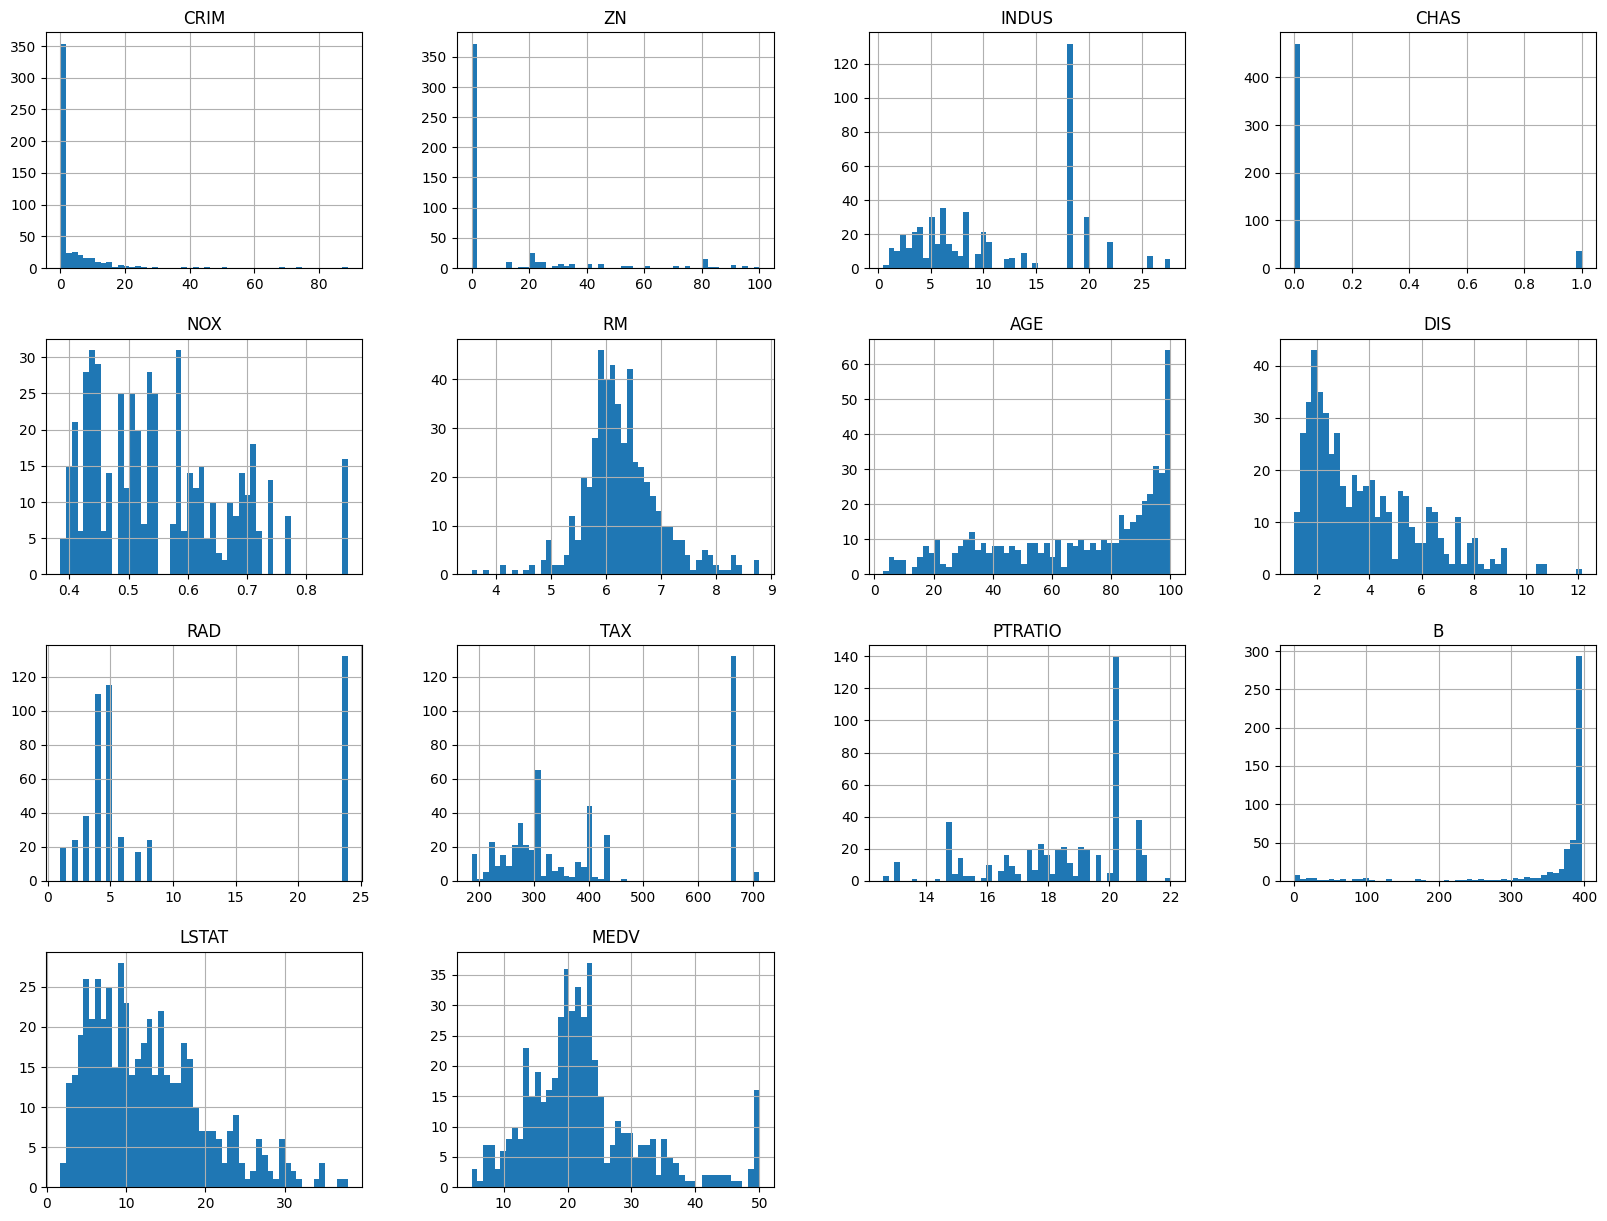

In [8]:
# Plotting histogram
housing.hist(bins=50, figsize=(20,15))

## Train - Test Splitting

In [9]:
# For learning purpose
def split_train_test(data, test_ratio):
    np.random.seed(42) # To freeze random number 
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[test_indices], data.iloc[train_indices]

In [10]:
test_set, train_set = split_train_test(housing, 0.2)

In [11]:
test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05,9.6
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22,17.2


In [12]:
train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
75,0.09512,0.0,12.83,0,0.4370,6.286,45.0,4.5026,5,398,18.7,383.23,8.94,21.4
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66,19.5
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00,21.1
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27,13.4


In [13]:
# Split train and test data using sklearn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [14]:
train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66,19.5
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00,21.1
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27,13.4


In [15]:
test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05,9.6
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22,17.2
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86,22.5


# But problem is we have CHAS attribute and it has value in 0 and 1 and 471 rows has 0 value and only 35 rows has 1 value and we don't want to all 0 value in our train set. if it's happen when we run our model. model doesn't know about 1 so it's can not predict best price. so we can use stratified shuffle from sklearn to equally split 0 and 1 values in train and test data set

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["CHAS"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
# Checking that CHAS splitting equally
strat_train_set["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
strat_test_set["CHAS"].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

## Looking for Correlations

<Axes: >

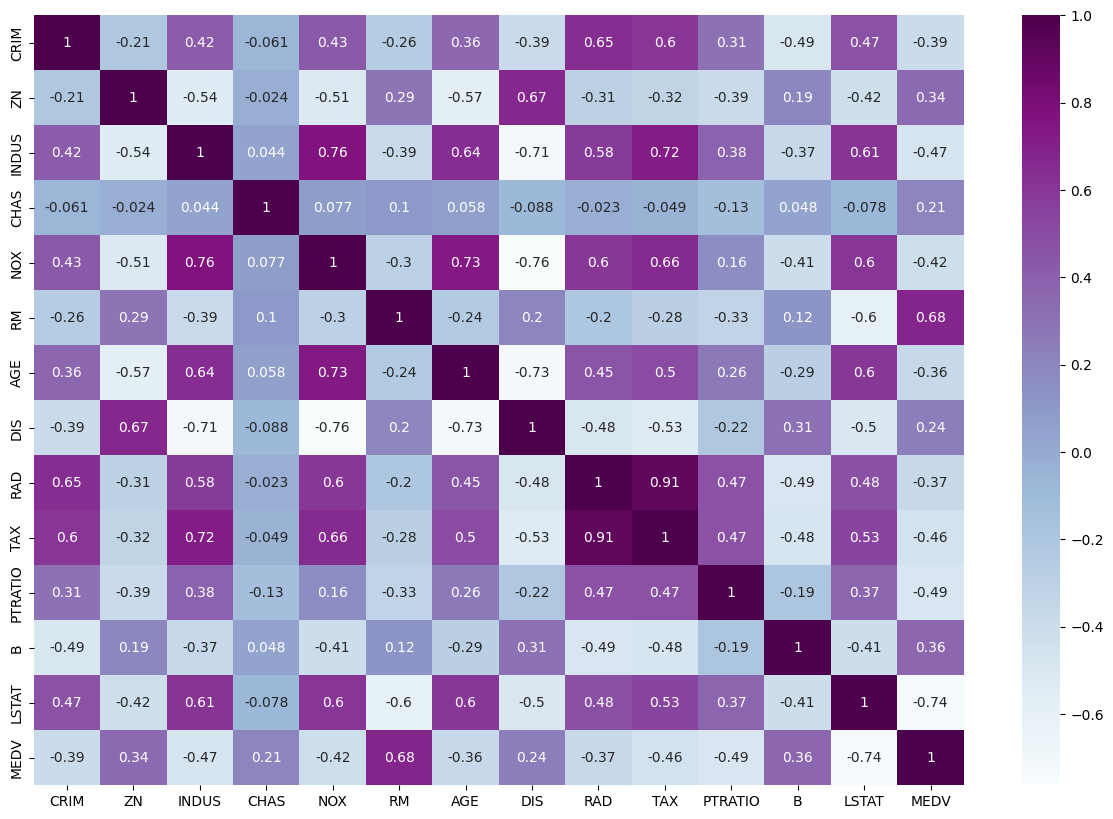

In [19]:
corr_matrix = strat_train_set.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data = corr_matrix, cmap = "BuPu", annot=True)

In [20]:
# To see correlation with one attribhute
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

# RM has positive correlation with MEDV(price) and LSTAT has negative correlation with MEDV(price)

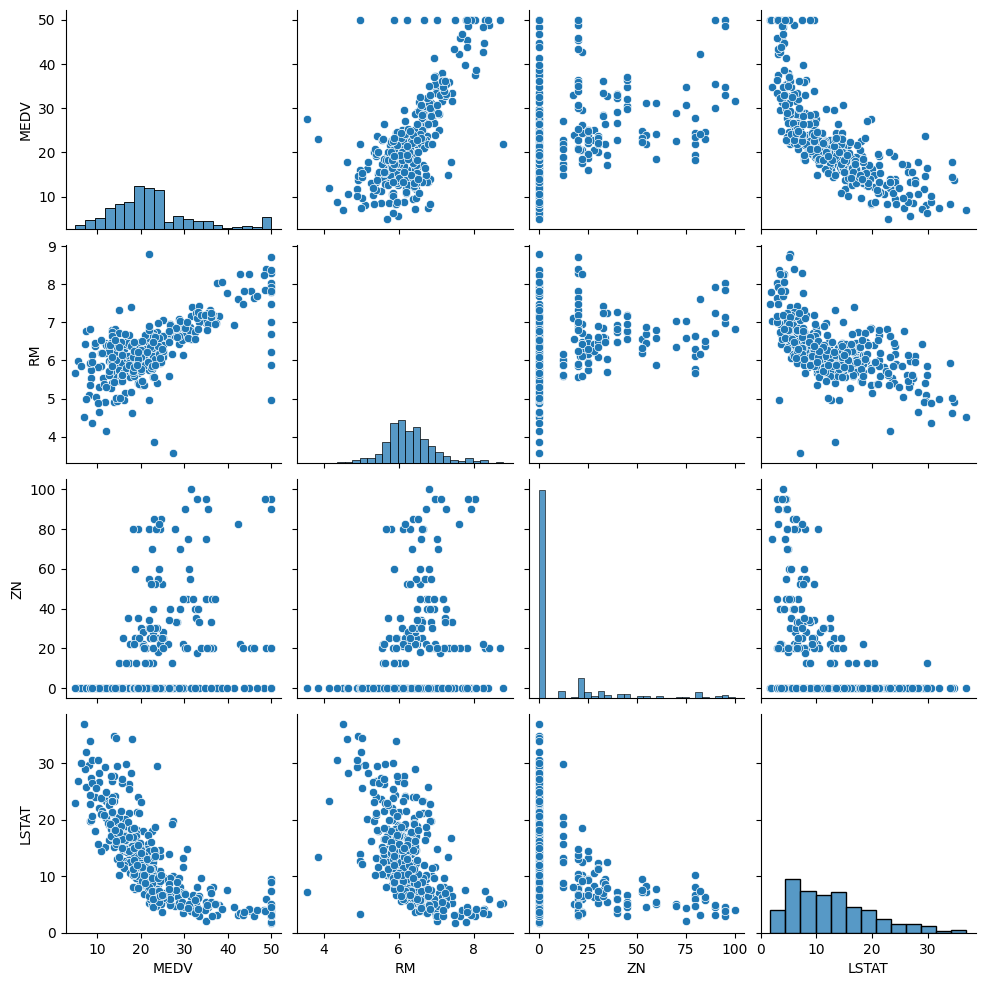

In [21]:
# to see correlation with scatter plot
attribhutes = ["MEDV", "RM", "ZN", "LSTAT"]
sns.pairplot(data = strat_train_set[attribhutes])

## Trying out attribute combination

In [22]:
strat_train_set["TAXRM"] = strat_train_set["TAX"] / strat_train_set["RM"]

In [23]:
strat_train_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [24]:
corr1_matrix = strat_train_set.corr()
corr1_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

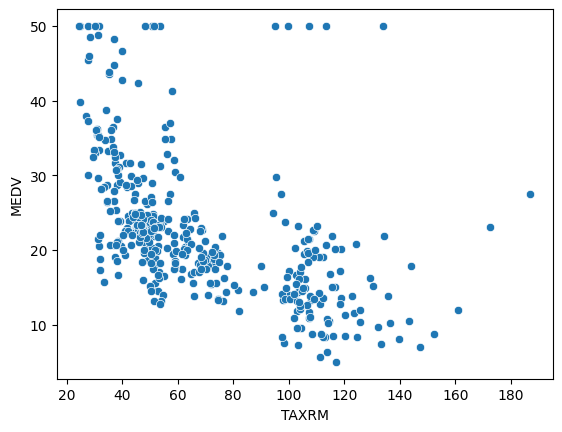

In [25]:
sns.scatterplot(x = "TAXRM", y = "MEDV", data = strat_train_set)

In [26]:
housing_train_set = strat_train_set.drop(["TAXRM","MEDV"], axis=1)
housing_labels = strat_train_set["MEDV"]

# Model work good if all column has same values scale so we automate this process to create Pipeline

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), # SimpleImputer use to fill Nan values because model doesn't accept Nan values
    ("min_max_scaler", MinMaxScaler()),
])

In [28]:
housing_train = my_pipeline.fit_transform(housing_train_set)

In [29]:
housing_train

array([[5.69444637e-04, 8.00000000e-01, 1.07407407e-01, ...,
        3.77777778e-01, 9.89888547e-01, 1.37304965e-01],
       [1.18186623e-04, 8.00000000e-01, 4.70370370e-02, ...,
        4.44444444e-01, 9.84971506e-01, 1.20851064e-01],
       [6.61666924e-02, 0.00000000e+00, 6.42962963e-01, ...,
        8.00000000e-01, 9.98260124e-01, 4.80851064e-01],
       ...,
       [1.02750280e-03, 0.00000000e+00, 7.96296296e-02, ...,
        5.55555556e-01, 9.91502345e-01, 5.21985816e-02],
       [6.45477124e-02, 0.00000000e+00, 6.42962963e-01, ...,
        8.00000000e-01, 1.27590902e-01, 4.65248227e-01],
       [5.34219855e-04, 0.00000000e+00, 4.87037037e-01, ...,
        3.77777778e-01, 9.89661607e-01, 3.34184397e-01]])

In [30]:
housing_train.shape

(404, 13)

## Selecting a desired model for Housing Property Price

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
#model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_train, housing_labels)

RandomForestRegressor()

In [32]:
housing_train_set.iloc[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [33]:
housing_labels.iloc[:5]

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [34]:
some_data = housing_train_set.iloc[:5]

In [35]:
some_labels = housing_labels.iloc[:5]

In [36]:
prepared_data = my_pipeline.transform(some_data)

In [37]:
model.predict(prepared_data)

array([22.463, 25.416, 16.37 , 23.488, 23.459])

In [38]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the Model

In [39]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_train)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [40]:
rmse

1.1635790446159238

# when you try to train different model you will get rmse is 0.0 means our training data is overfit so we have to use Cross Validation

## Using better Evaluation Technique - Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_train, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [42]:
rmse_scores

array([2.77505825, 2.74391248, 4.37823925, 2.53551991, 3.33049097,
       2.63349201, 4.69981508, 3.31283882, 3.34590121, 3.19269715])

In [43]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [44]:
print_scores(rmse_scores)

Scores:  [2.77505825 2.74391248 4.37823925 2.53551991 3.33049097 2.63349201
 4.69981508 3.31283882 3.34590121 3.19269715]
Mean:  3.2947965105832075
Standard deviation:  0.6892014663556439


## Saving the Model

In [45]:
from joblib import dump, load
dump(model, "HousePricePredictor.joblib")

['HousePricePredictor.joblib']

## Testing the Model on test Data

In [46]:
x_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"]
x_test_prepared = my_pipeline.transform(x_test)
test_data_prediction = model.predict(x_test_prepared)
test_data_mse = mean_squared_error(y_test, test_data_prediction)
test_data_rmse = np.sqrt(test_data_mse)
print(test_data_prediction, list(y_test)) # To see difference between actual price and predicted price

[24.55  11.696 25.379 22.013 18.164 15.038 19.867 14.427 31.3   40.715
 19.706 11.587 24.298 28.689 19.654 10.544 31.726 14.588 23.659 18.914
 19.812 18.087 17.296 22.051 17.973 30.701 16.29  32.661  8.753 33.763
 23.782 21.386 22.797 10.995 21.023 11.303 42.768 24.328 23.043 41.461
 24.029 29.58  20.631 21.013 19.447 33.51  44.404 20.211 20.374 21.698
 21.432 14.472 20.986 14.956 24.906 32.639 43.068 28.434 19.118 20.959
 47.412 10.018 18.815 24.396 14.954 32.847 19.237 18.045 18.976 34.223
 27.133 22.727 21.519 22.156 35.134 12.732 15.842 20.023 20.817 21.461
 22.282 21.374 14.354 22.672 20.717 21.144 13.982 21.341 21.319 23.578
 18.869 27.296  7.133 26.128 18.951 29.97  19.691 31.244 14.513 26.362
 20.883 20.006] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [47]:
test_data_rmse

2.9090415307195214